In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from gurobipy import *
import pickle
from itertools import chain, combinations

In [3]:
uti = pd.read_csv("utilities.csv", sep=";")["[0.67, 0.33]"]

In [4]:
uti = [float(u.replace(",", ".")) for u in list(uti)]

In [5]:
uti

[0.694725,
 0.665,
 0.862225,
 0.8069500000000001,
 0.5255500000000001,
 0.75,
 0.887775,
 0.944725,
 0.8894500000000001,
 0.75,
 0.6097250000000001,
 0.8052750000000001,
 0.720275,
 0.637775,
 0.8894500000000001,
 0.5825,
 0.665,
 0.5825,
 0.75,
 0.6675000000000001]

In [6]:
may_portfolio = pd.read_csv("67_33_50_may.csv", sep=";")

In [7]:
june_porfolio = pd.read_csv("67_33_50.csv", sep=";")

## Processing June

In [8]:
df2 = pd.read_excel("inter_updated.xlsx", header=None)

score_list = []
for i in range(20):
    print("i: ", i)
    for j in range(i, 19):
        print("j: ",j)
        score = df2.iloc[i,j]
        if type(score) == str:
            score_list.append(score.replace(' ', ''))
            
score_dict = {'+':0.33, '++': 0.66, '+++': 1, '+++(+)': (1+1.33)/2,'+/-':0, '-':-0.33, '0/+':(0.33/2) }

i:  0
j:  0
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  1
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  2
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  3
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  4
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  5
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  6
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  7
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  8
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
i:  9
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j

In [9]:
score_df = pd.DataFrame()
score_df["effect"] = score_dict.keys()
score_df["gamma"] = score_dict.values()
score_df.to_csv("effect")

In [25]:
inter_subset_june = []
inter_effect_june = []

for i in range(20):
    for j in range(i, 19):
        score = df2.iloc[i,j]
        if type(score) == str:
            score = score.replace(' ', '')
            
            try:
                inter_effect_june.append(score_dict[score])
                inter_subset_june.append([i,j+1])
            except:
                pass

## Processing May

In [11]:
df = pd.read_csv("data.csv", sep=";", index_col=0)

In [12]:
int_col =[str(i) for i in range(1,21)]

pos_subsets = []
neg_subsets = []

for i in range(1,21): #for loop for row
    for j in range(1,21): #for loop for columns
        val = df[int_col].loc[i][str(j)]
        print((i,j))
        print(val)
        if val == 1.0 or val == "1":
            print("pos")
            pos_subsets.append((i-1, j-1))
        elif val == "1, -1" or val == '1, -1 ':
            pos_subsets.append((i-1,j-1))
            neg_subsets.append((i-1,j-1))
        elif val == -1.0 or val == "-1":
            neg_subsets.append((i-1,j-1))
        else:
            pass

(1, 1)
nan
(1, 2)
nan
(1, 3)
nan
(1, 4)
1
pos
(1, 5)
1.0
pos
(1, 6)
1.0
pos
(1, 7)
-1
(1, 8)
nan
(1, 9)
-1
(1, 10)
nan
(1, 11)
nan
(1, 12)
nan
(1, 13)
nan
(1, 14)
nan
(1, 15)
nan
(1, 16)
nan
(1, 17)
nan
(1, 18)
nan
(1, 19)
nan
(1, 20)
nan
(2, 1)
nan
(2, 2)
nan
(2, 3)
1.0
pos
(2, 4)
nan
(2, 5)
1.0
pos
(2, 6)
-1.0
(2, 7)
nan
(2, 8)
nan
(2, 9)
nan
(2, 10)
nan
(2, 11)
nan
(2, 12)
nan
(2, 13)
1
pos
(2, 14)
1.0
pos
(2, 15)
nan
(2, 16)
nan
(2, 17)
nan
(2, 18)
nan
(2, 19)
nan
(2, 20)
nan
(3, 1)
nan
(3, 2)
-1.0
(3, 3)
nan
(3, 4)
1, -1
(3, 5)
nan
(3, 6)
1.0
pos
(3, 7)
nan
(3, 8)
nan
(3, 9)
nan
(3, 10)
nan
(3, 11)
nan
(3, 12)
nan
(3, 13)
nan
(3, 14)
nan
(3, 15)
1.0
pos
(3, 16)
nan
(3, 17)
nan
(3, 18)
nan
(3, 19)
nan
(3, 20)
nan
(4, 1)
nan
(4, 2)
1.0
pos
(4, 3)
nan
(4, 4)
nan
(4, 5)
1.0
pos
(4, 6)
nan
(4, 7)
nan
(4, 8)
nan
(4, 9)
nan
(4, 10)
nan
(4, 11)
nan
(4, 12)
nan
(4, 13)
nan
(4, 14)
nan
(4, 15)
nan
(4, 16)
nan
(4, 17)
1, -1
(4, 18)
nan
(4, 19)
nan
(4, 20)
nan
(5, 1)
nan
(5, 2)
1.0
pos
(5, 3)

In [13]:
class Project:
    def __init__(self, num=0, desc=0, a1=0, a2=0, w=[1/2, 1/2], cost=1):
        self.num = num
        self.desc = desc
        self.a1 = a1
        self.a2 = a2    
        self.cost = cost
        self.w = w
                
    def cal_value(self):
        self.value = (self.a1/4)*self.w[0] + (self.a2/4)*self.w[1]
        
    def describe(self):
        print("Project " + self.desc)
        print("a1: ", self.a1)
        print("a2: ", self.a2)
        print("cost: ", self.cost)
        print("w: ", self.w)
        print("value: ", self.value)

project_list = []
for i in range(20):
    r = df.iloc[i]
    
    p = Project(num=i+1)
    p.desc = r["Action idea name"]
    p.a1 = float(r["Hiilineutraalisuus carbon neutrality (avg)  "].replace(',', '.'))
    p.a2 = float(r["Varautuminen Resilience (avg)  "].replace(',', '.'))
    p.pos_impact = float(r["Positiiviset vaikutukset (avg)  "].replace(',', '.'))
    p.neg_impact = float(r["Negatiiviset vaikutukset (neg. impact)  (avg)  "].replace(',', '.'))
    p.cal_value()
    
    project_list.append(p)

In [14]:
effect_dict = {}
for subset in pos_subsets:
    ss_key = tuple(sorted(subset))
    if ss_key in effect_dict:
        effect_dict[ss_key].append(project_list[subset[0]].pos_impact)
    else:
        effect_dict[ss_key] = [project_list[subset[0]].pos_impact]
    
for subset in neg_subsets:
    ss_key = tuple(sorted(subset))
    if ss_key in effect_dict:
        effect_dict[ss_key].append(project_list[subset[0]].neg_impact)
    else:
        effect_dict[ss_key] = [project_list[subset[0]].neg_impact]

In [15]:
effect_dict

{(0, 3): [3.67],
 (0, 4): [3.67],
 (0, 5): [3.67],
 (1, 2): [3.5, -1.5],
 (1, 4): [3.5, 3.0],
 (1, 12): [3.5, 2.67],
 (1, 13): [3.5, 3.33],
 (2, 3): [3.5, -1.5],
 (2, 5): [3.5, -2.33],
 (2, 14): [3.5],
 (1, 3): [3.5],
 (3, 4): [3.5, -0.5],
 (3, 16): [3.5, 3.5, -1.0],
 (2, 4): [3.0],
 (4, 7): [3.0, 4.0],
 (1, 5): [2.33, -0.5],
 (5, 14): [2.33],
 (5, 18): [2.33],
 (0, 6): [4.0, -0.5],
 (6, 8): [4.0, 4.0, -1.0],
 (6, 12): [4.0, 0.0],
 (1, 7): [4.0],
 (7, 12): [4.0],
 (7, 14): [4.0],
 (1, 9): [3.67],
 (4, 9): [3.67],
 (9, 12): [3.67],
 (1, 10): [2.67],
 (4, 10): [2.67],
 (10, 12): [2.67, 2.67],
 (10, 15): [2.67],
 (2, 11): [3.0],
 (4, 12): [2.67],
 (12, 13): [2.67, 3.33],
 (4, 13): [3.33],
 (13, 15): [3.33],
 (1, 14): [3.0],
 (4, 14): [3.0],
 (6, 14): [3.0],
 (12, 14): [3.0],
 (8, 15): [3.5, -2.0],
 (12, 15): [3.5],
 (1, 16): [3.5],
 (6, 17): [2.5, 0.0],
 (12, 17): [2.5],
 (0, 8): [-0.5],
 (4, 5): [-0.5, -2.33],
 (5, 12): [-2.33],
 (7, 17): [-0.33],
 (5, 11): [-0.33],
 (15, 17): [-2.0]}

In [16]:
uti

[0.694725,
 0.665,
 0.862225,
 0.8069500000000001,
 0.5255500000000001,
 0.75,
 0.887775,
 0.944725,
 0.8894500000000001,
 0.75,
 0.6097250000000001,
 0.8052750000000001,
 0.720275,
 0.637775,
 0.8894500000000001,
 0.5825,
 0.665,
 0.5825,
 0.75,
 0.6675000000000001]

In [18]:
inter_effect_may = []

for k, val in effect_dict.items():
    #print(k)
    #print(val)
    effect = 0.25*np.mean(val)*uti[k[0]]*uti[k[1]]
    inter_effect_may.append(effect)

In [20]:
inter_subset_may = list(effect_dict.keys() )

In [40]:
effect_may_june = []

for i in range(len(inter_subset_may)):
    for j in range(len(inter_subset_june)):
        
        if list(inter_subset_may[i]) == inter_subset_june[j]:
            print("interaction subet:")
            print(list(inter_subset_may[i]))
            print("inter_effet_may:")
            print(inter_effect_may[i])
            print("inter_effet_june:")
            print(inter_effect_june[j]*np.mean(uti))   
            print()
            print("effect may/june:")
            effect_may_june.append(inter_effect_may[i]/inter_effect_june[j]*np.mean(uti))
            print(inter_effect_may[i]/inter_effect_june[j]*np.mean(uti))
            print()
            print()
            print()
            
        
        

interaction subet:
[0, 3]
inter_effet_may:
0.5143581508031251
inter_effet_june:
0.1211628

effect may/june:
2.289111983622732



interaction subet:
[0, 5]
inter_effet_may:
0.478057640625
inter_effet_june:
0.1211628

effect may/june:
2.1275593131136366



interaction subet:
[1, 2]
inter_effet_may:
0.14334490625000001
inter_effet_june:
0.4846512

effect may/june:
0.15948641145075756



interaction subet:
[1, 4]
inter_effet_may:
0.28396123437500004
inter_effet_june:
0.4846512

effect may/june:
0.31593699034280304



interaction subet:
[1, 12]
inter_effet_may:
0.36941554234375007
inter_effet_june:
0.8554828

effect may/june:
0.23284911678443135



interaction subet:
[2, 3]
inter_effet_may:
0.1739431159375
inter_effet_june:
0.2423256

effect may/june:
0.3870603299855303



interaction subet:
[1, 3]
inter_effet_may:
0.46954403125000005
inter_effet_june:
0.2423256

effect may/june:
1.044835069780303



interaction subet:
[2, 4]
inter_effet_may:
0.33985676156250005
inter_effet_june:
0.2423256


/var/folders/m0/4kgydjmn6590r2xq4gdjzq3m0000gn/T/ipykernel_7778/2362436337.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  effect_may_june.append(inter_effect_may[i]/inter_effect_june[j]*np.mean(uti))
/var/folders/m0/4kgydjmn6590r2xq4gdjzq3m0000gn/T/ipykernel_7778/2362436337.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  print(inter_effect_may[i]/inter_effect_june[j]*np.mean(uti))


Text(0.5, 1.0, 'Interaction effect May/Interaction effect June')

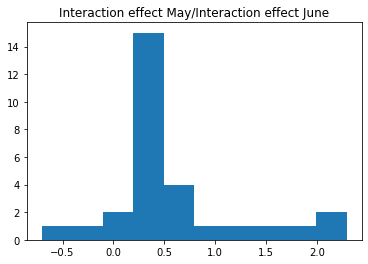

In [49]:
import math
plt.hist([x for x in effect_may_june if not math.isinf(x)])
plt.title("Interaction effect May/Interaction effect June")

In [50]:
np.median([x for x in effect_may_june if not math.isinf(x)])

0.3557235991423863

In [32]:
list(inter_subset_may[0]) == inter_subset_june[0]

True

In [27]:
inter_effect_may

[0.5143581508031251,
 0.334990924040625,
 0.478057640625,
 0.14334490625000001,
 0.28396123437500004,
 0.36941554234375007,
 0.36209277015624997,
 0.1739431159375,
 0.0945753046875,
 0.67104277296875,
 0.46954403125000005,
 0.15903471468750002,
 0.26831087500000006,
 0.33985676156250005,
 0.4344376957812501,
 0.11408906250000002,
 0.38857846875,
 0.32765625,
 0.2698322755078125,
 0.46061835968750003,
 0.3197210690625,
 0.6282421250000001,
 0.6804617993750001,
 0.8402856512500001,
 0.457603125,
 0.36164409375000006,
 0.495639234375,
 0.27064930593750003,
 0.21389434997812504,
 0.29314575764531253,
 0.23707251234375004,
 0.5207461776562501,
 0.252675801271875,
 0.34453004109374996,
 0.27903955716562506,
 0.30927702796875,
 0.44361318750000006,
 0.3505878356250001,
 0.5922236053125001,
 0.48048644906250004,
 0.0971446171875,
 0.3671151640625,
 0.386946875,
 0.16160279296875,
 0.2622251171875,
 -0.07724039390625001,
 -0.13943498437500002,
 -0.314670140625,
 -0.04539994078125001,
 -0.049826

In [34]:
inter_effect_june[0]*np.mean(uti)

0.1211628